In [29]:
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso

model = Lasso()

from sklearn.model_selection import train_test_split

In [30]:
X = pd.read_csv(r'C:\Scripts\Proyectos\Predicción_de_ingresos_peliculas\Data\X_opening.csv')

y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)
X = X.drop('opening_gross',axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y) #En este caso no se indica el porcentaje de datos para entrenamiento, si no se toman los valores predeterminados de Skilearn.

In [32]:
len(X_train)/len(X)

0.75

In [33]:
model.fit(X_train,y_train)

Lasso()

In [34]:
model.score(X_test,y_test)

0.5392870494776496

A continuación se hace una validación de los parametros (Evaluación de features) de la regresión Lineal: 

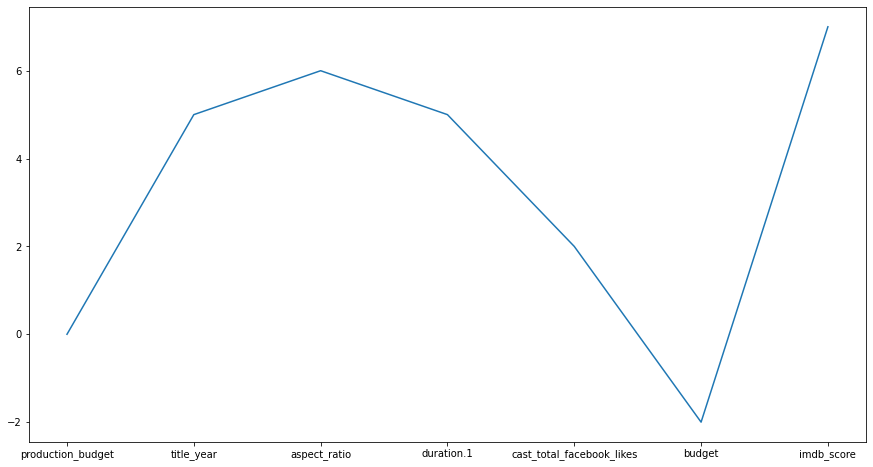

In [36]:
var = np.floor(np.log10(np.abs(model.coef_)))

plt.rcParams["figure.figsize"] = [15,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));


Esto nos guía a guardar únicamente:

- production_budget
- title_year
- duration
- cast_total_facebook_likes
- imdb_score

# Correlación de las variables

En este segmento se validara la correlación de las variables con la objetivo, de esto se busca identificar todas las features que pueden llegar a ser informativas.

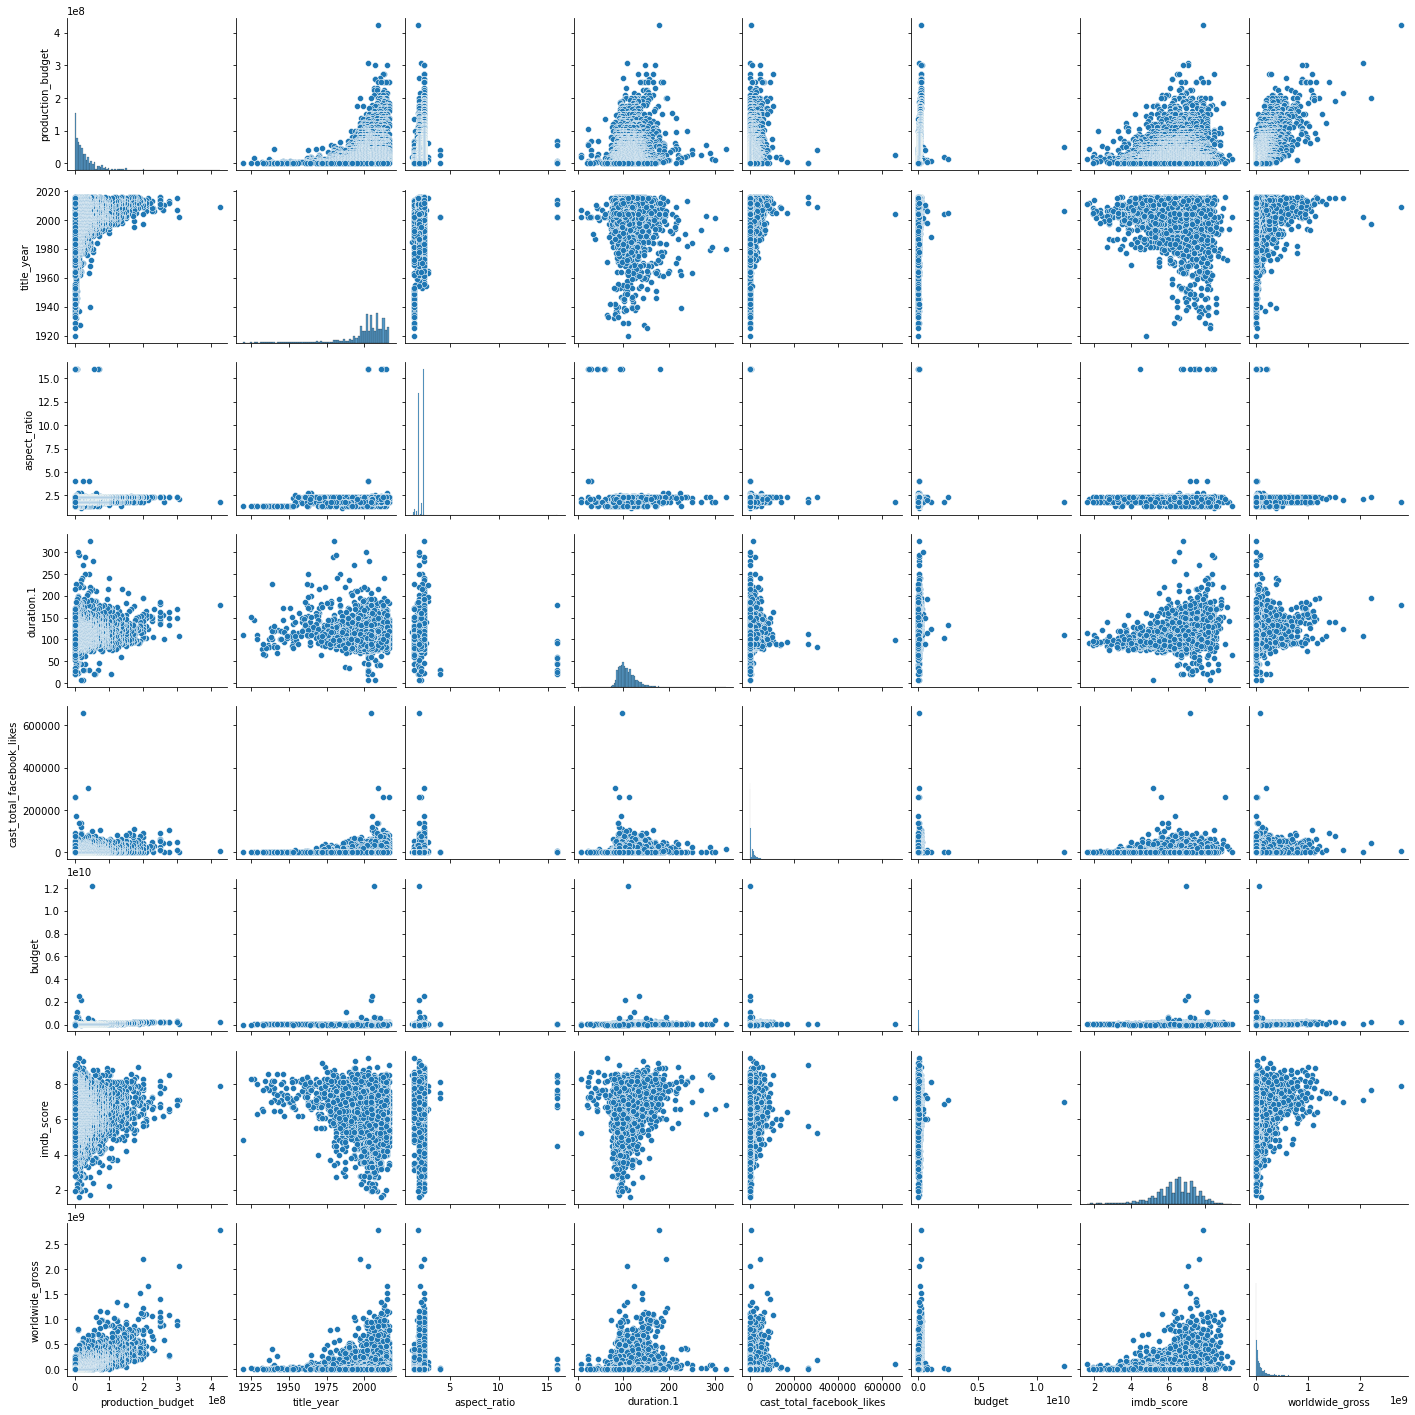

In [37]:
Z = pd.concat([X,y],axis=1)
sns.pairplot(Z)

In [40]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class') # Se divide en 8 grupos con el fin de poder ver el detalle 
Z2 = pd.concat([X,clase],axis=1)

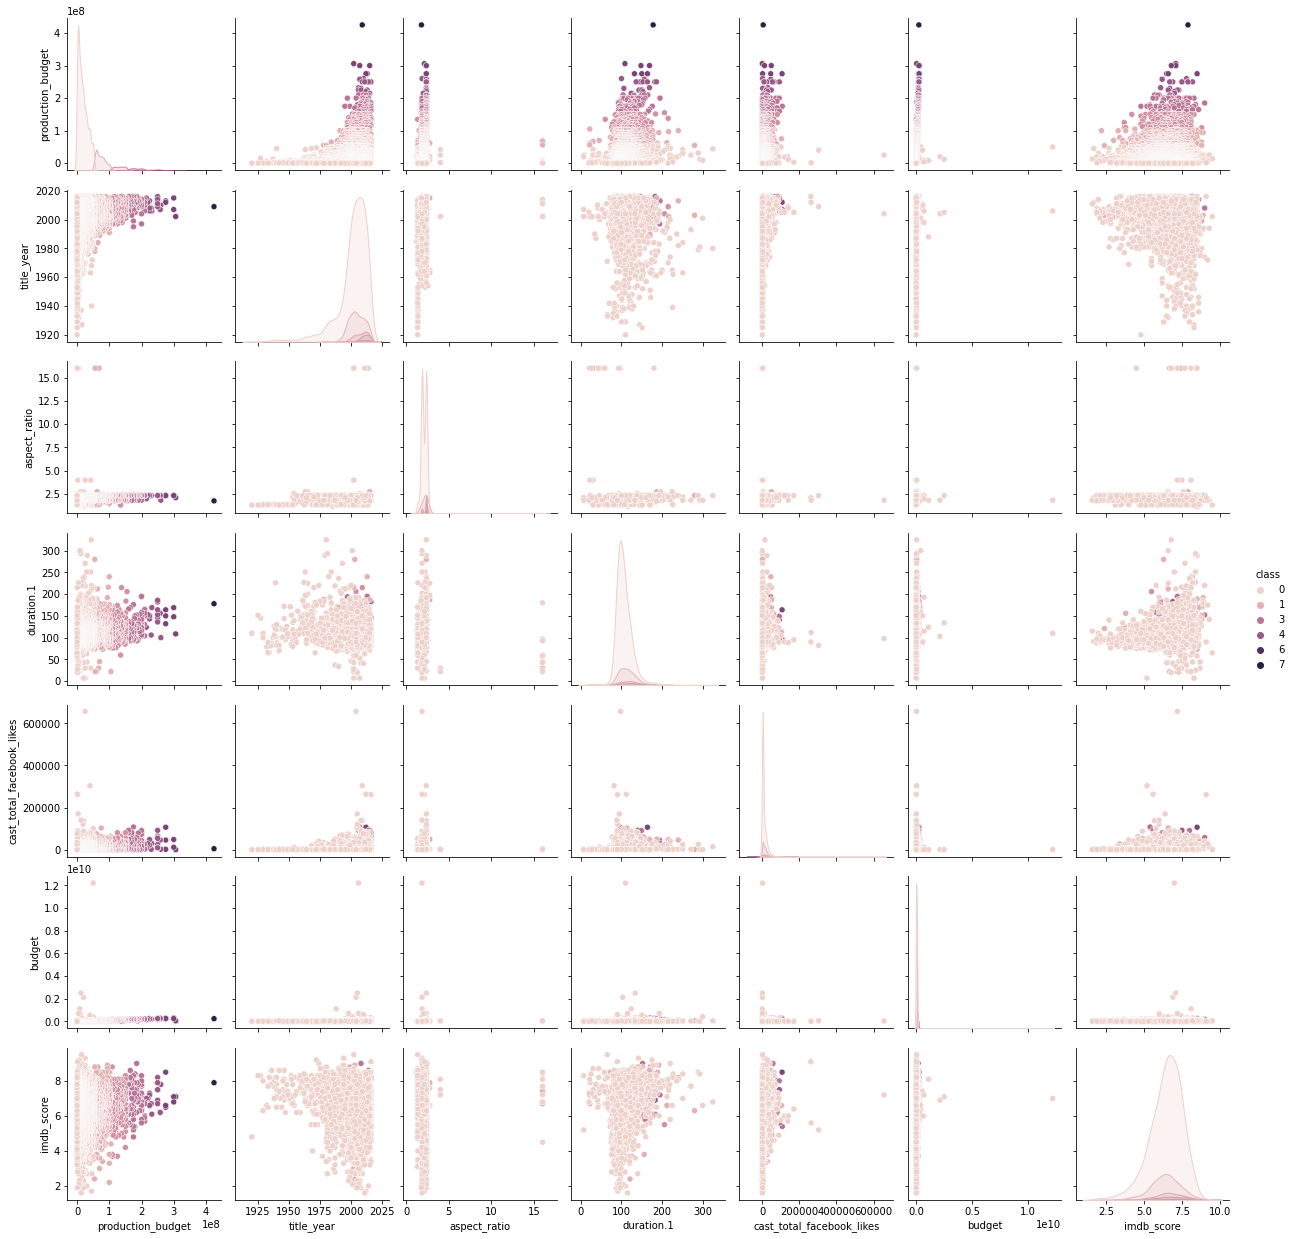

In [39]:
sns.pairplot(Z2,hue='class')

<AxesSubplot:>

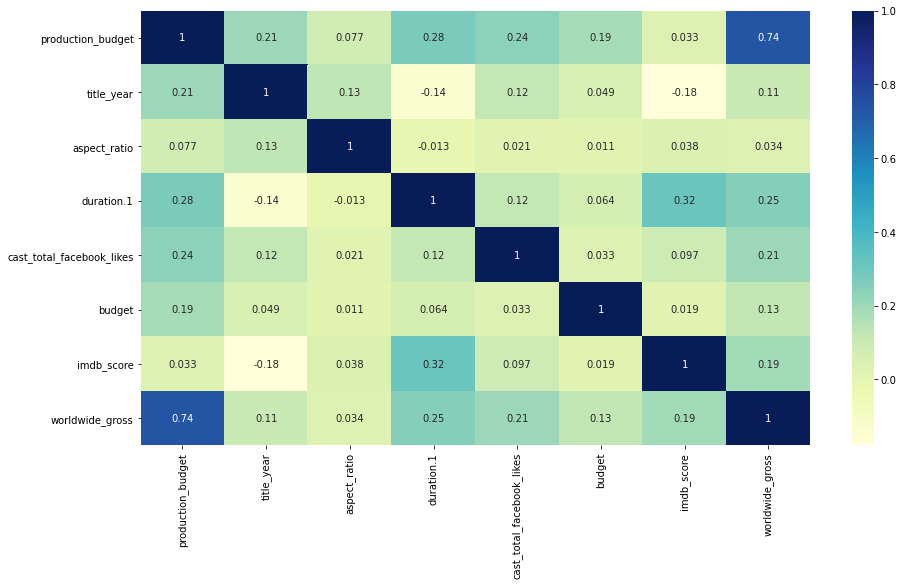

In [43]:
Z3 = pd.concat([X,y],axis=1)
sns.heatmap(Z3.corr(),cmap="YlGnBu",annot=True)


De esto concluimos, sin sorpresa, que son muy importantes:

- production_budget
- imdb_score

# Validación automatica de features por Sklearn

Finalmente se hace una validación automatica con el fin de ratificar las variables necesarias para el modelo.

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x00000294275BAAF0>)

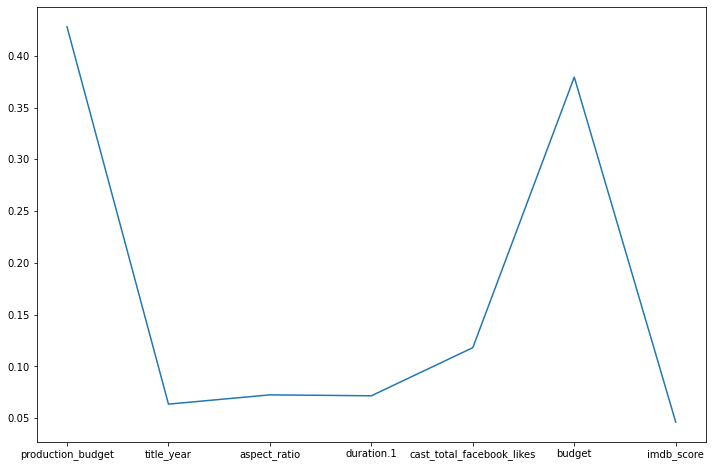

In [47]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));


Del analisis univariante obtenemos que las mejores features son:

- production_budget
- cast_total_facebook_likes
- budget

## Conclusión 

De estas iteraciones y validaciones se guardan las features entregadas por la interpretación de Lasso.

In [49]:
X2 = X[['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']] #Lasso
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']] #Variables presentes en todos los metodos

# Nueva Validación del modelo con las features seleccionadas

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [54]:
#En este caso se definen las variables para cada caso con el fin de que la aleatoriedad de la selección no genere dificultades en la comparación.

cols2 = ['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score'] 
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [52]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

Lasso()

In [53]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.5528953872787216
0.5544847981704676
0.5559449413350668
